### Examples of Regression problems
- How much the house sells for
- How many people will buy this app
- How much will my health insurance be
- How much should I save each week for fuel

### Anatomy of NN regression model
- Input layer shape
- Hidden layers
- Neurons per hidden layer
- Output layer shape - Based on the data being predicted, [1] for prices
- Hidden activation - usually ReLu
- Output activation (None, Relu, Logistic/Tanh)
- Loss function - A function of the error that we are trying to minimize to get accuracte results (MAE, MSE, Buber(combination of MSE and MAE) if you have outliers)
- Optimizer -  what we use to minimize the loss function (SGD, Adam)

In [1]:
import tensorflow as tf
print(tf.__version__)

2.5.0


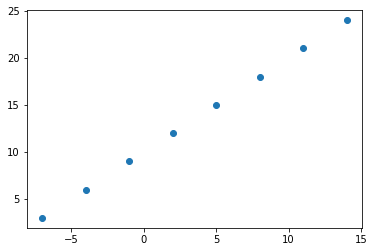

In [2]:
# Creating data to view and fit
import numpy as np
import matplotlib.pyplot as plt

# create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Createa labels 
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# visalize
plt.scatter(X, y)

### the relationship we are trying to learn here is
y = X + 10 

In [3]:
house_info = tf.constant(['bedroom', 'bathroom', 'garage'])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [4]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

- We want to reference one X detail and reference one corresponding y detail, x[0] -> y[0]

### Major steps in modelling with tf

In [5]:
 # change np arrays to tensors
 X = tf.constant(X)
 y = tf.constant(y)
 X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [6]:
# Single value in the X and y
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

#### Steps
1. **Creating a model** - define the input and output layers and hidden layers of the deep learning model
2. **compiling a model** -  define the loss function and the optimizer and the evaluation metrics
3. fitting a model- letting the model try to fit patterns between X and y

In [7]:
# set random seed
tf.random.set_seed(42)

#1. create the model
model = tf.keras.Sequential([
      tf.keras.layers.Dense(1)
])
'''
# same as above
model = tf.keras.Sequential()
model.add(tf.keras.leyers.Dense(1))

'''

#2. Compile the model
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['mae'])

#3. Fit the model
model.fit(X, y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 510ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 4ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 7ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 5ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 4ms/step - loss: 10.9748 - mae: 10.9748


In [8]:
# make a prediction
model.predict([17.0])

array([[12.716021]], dtype=float32)

- Output is off
### Improve model

1. creating model -  add model layers, increase units of hidden units called neurons
2. compiling a model - change the optimization, or learning rate of the optimziation funtion
3. Fitting the model - run it for more epochs


In [9]:
## rebuild the model with more epochs

model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
             optimizer = tf.keras.optimizers.SGD(),
             metrics=['mae'])

model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 232ms/step - loss: 11.2219 - mae: 11.2219
Epoch 2/100
1/1 [==============================] - 0s 6ms/step - loss: 11.0894 - mae: 11.0894
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 10.9569 - mae: 10.9569
Epoch 4/100
1/1 [==============================] - 0s 3ms/step - loss: 10.8244 - mae: 10.8244
Epoch 5/100
1/1 [==============================] - 0s 3ms/step - loss: 10.6919 - mae: 10.6919
Epoch 6/100
1/1 [==============================] - 0s 3ms/step - loss: 10.5594 - mae: 10.5594
Epoch 7/100
1/1 [==============================] - 0s 3ms/step - loss: 10.4269 - mae: 10.4269
Epoch 8/100
1/1 [==============================] - 0s 3ms/step - loss: 10.2944 - mae: 10.2944
Epoch 9/100
1/1 [==============================] - 0s 3ms/step - loss: 10.1619 - mae: 10.1619
Epoch 10/100
1/1 [==============================] - 0s 3ms/step - loss: 10.0294 - mae: 10.0294
Epoch 11/100
1/1 [==============================] - 0s 3

In [10]:
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [11]:
model.predict([17.0])

array([[29.739855]], dtype=float32)

In [12]:
## Rebuild the model with more layers and neurons
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation=None),
    tf.keras.layers.Dense(1)
])

model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['mae']
)

model.fit(X, y, epochs=55)

Epoch 1/55
1/1 [==============================] - 0s 364ms/step - loss: 12.0109 - mae: 12.0109
Epoch 2/55
1/1 [==============================] - 0s 6ms/step - loss: 11.9188 - mae: 11.9188
Epoch 3/55
1/1 [==============================] - 0s 7ms/step - loss: 11.8264 - mae: 11.8264
Epoch 4/55
1/1 [==============================] - 0s 6ms/step - loss: 11.7340 - mae: 11.7340
Epoch 5/55
1/1 [==============================] - 0s 10ms/step - loss: 11.6413 - mae: 11.6413
Epoch 6/55
1/1 [==============================] - 0s 8ms/step - loss: 11.5485 - mae: 11.5485
Epoch 7/55
1/1 [==============================] - 0s 4ms/step - loss: 11.4555 - mae: 11.4555
Epoch 8/55
1/1 [==============================] - 0s 6ms/step - loss: 11.3622 - mae: 11.3622
Epoch 9/55
1/1 [==============================] - 0s 6ms/step - loss: 11.2688 - mae: 11.2688
Epoch 10/55
1/1 [==============================] - 0s 5ms/step - loss: 11.1752 - mae: 11.1752
Epoch 11/55
1/1 [==============================] - 0s 5ms/step - l

In [13]:
model.predict([18.0])

array([[33.20948]], dtype=float32)

In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation=None),
    tf.keras.layers.Dense(1)
])

model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(lr=0.01),
    metrics = ['mae']
)

model.fit(X, y, epochs=55)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/55
1/1 [==============================] - 0s 298ms/step - loss: 12.9917 - mae: 12.9917
Epoch 2/55
1/1 [==============================] - 0s 4ms/step - loss: 12.0062 - mae: 12.0062
Epoch 3/55
1/1 [==============================] - 0s 6ms/step - loss: 11.0143 - mae: 11.0143
Epoch 4/55
1/1 [==============================] - 0s 6ms/step - loss: 10.0116 - mae: 10.0116
Epoch 5/55
1/1 [==============================] - 0s 12ms/step - loss: 8.9926 - mae: 8.9926
Epoch 6/55
1/1 [==============================] - 0s 4ms/step - loss: 7.9516 - mae: 7.9516
Epoch 7/55
1/1 [==============================] - 0s 5ms/step - loss: 6.8829 - mae: 6.8829
Epoch 8/55
1/1 [==============================] - 0s 6ms/step - loss: 7.0003 - mae: 7.0003
Epoch 9/55
1/1 [==============================] - 0s 5ms/step - loss: 7.4311 - mae: 7.4311
Epoch 10/55
1/1 [==============================] - 0s 6ms/step - loss: 7.9359 - mae: 7.9359
Epoch 11/55
1/1 [==============================] - 0s 9ms/step - loss: 8.0257 

In [15]:
model.predict([18.0])

array([[28.360376]], dtype=float32)

- The learning rate is the most powerful parameter in training a nn

### Improving models
- Adding layers
- increase the number of hidden units
- change the activation functions
- change the optimization function
- change the learning rate
- Fitting on more data
- fitting for longer by increasing epochs

> these values that we can modify are called HyperParameters

- when building the model, experiement more,
- when testing the model visualize more

#### Bigger Dataset

In [16]:
X = tf.constant(range(-100, 100, 4))
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [17]:
y = X + 10

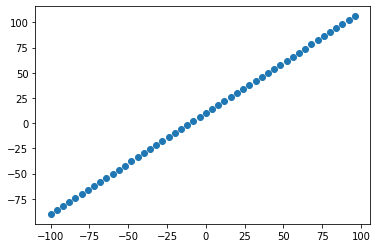

In [18]:
plt.scatter(X, y)

#### Training testing splitting


In [19]:
len(X)

50

In [20]:
# from sklearn.model_selection import train_test_split

In [21]:
X_train = X[:40] #First 80per
X_test = X[40:]

y_train = y[:40]
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

#### visualizing data
- Visualizing training and testing data

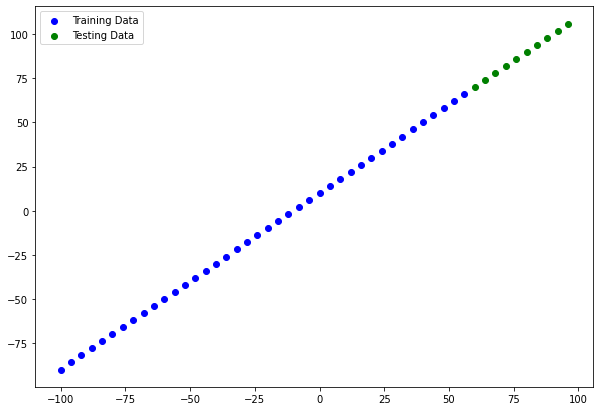

In [22]:
plt.figure(figsize=(10,7))

plt.scatter(X_train, y_train, c='b', label='Training Data')
plt.scatter(X_test, y_test, c='g', label='Testing Data')
plt.legend()

### Neural network

In [23]:
#1. Create a model
model = tf.keras.Sequential([
        tf.keras.layers.Dense(1)
])
# 2. compile the model
model.compile(
    loss = tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['mae']
)


In [25]:
model.build()

ValueError: ignored

In [26]:
# create a model that builds automatically by including input shape
tf.random.set_seed(42)
#1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1]) # we are using one value to predict one value
])

# compile the model
model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics=['mae']
)

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 10)                20        
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________


- total params - total number of parameters in the model, X and Y
- Trainable parameters - there are the paramaeters(patterns) the model can update as it trains
- Non-trainable params - which are not updated during training,  when you bring in already learned params from other models

- 10 hidden units results in  20 params, 20 trainable params
- weight and bias for each hidden unit

In [27]:
model.fit(X_train, y_train, epochs=100, verbose=0)

In [28]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 10)                20        
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________


In [29]:
from tensorflow.keras.utils import plot_model


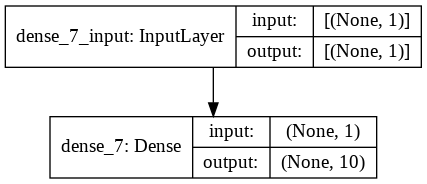

In [30]:
plot_model(model=model, show_shapes=True)

In [31]:
tf.random.set_seed(42)
model = tf.keras.Sequential(
    [
     tf.keras.layers.Dense(10, input_shape=[1], name='input_layer'),
     tf.keras.layers.Dense(1, name="output_layer")
    ],
    name="model2"
)

model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(lr=0.01),
    metrics=['mae']
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [32]:
model.summary()

Model: "model2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 10)                20        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


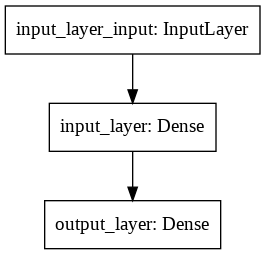

In [33]:
plot_model(model)

### visualizing model predictions

- to visualize predictions its good to plot them against the ground truth labels


In [34]:
model.fit(X_train, y_train, epochs=100, verbose=0)

In [35]:
y_pred = model.predict(X_test)
y_pred, y_test

(array([[ 72.42797 ],
        [ 76.58641 ],
        [ 80.74485 ],
        [ 84.90329 ],
        [ 89.06173 ],
        [ 93.22018 ],
        [ 97.378624],
        [101.537056],
        [105.695496],
        [109.853935]], dtype=float32),
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

#### Creating a plotting function

In [36]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  '''
  Plots training data, test data and compares predictions to ground truth labels
  '''
  plt.figure(figsize=(10,7))
  # plot training data in blue
  plt.scatter(train_data, train_labels, c='b', label="Training data")
  
  #plot testing data in green
  plt.scatter(test_data, test_labels, c='g', label="Testing data")

  #plot predictions in red
  plt.scatter(test_data, predictions, c="r", label="predictions")
  plt.legend()

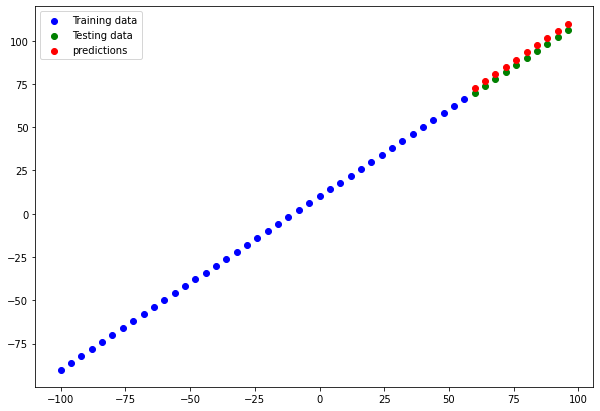

In [37]:
plot_predictions()

### Evaluation Metrics
for regression: 
- **MAE**: mean absolute error get abs and find mean
- **MSE**: mean square error, get squares and find mean- when larger errors are more significant than smaller onese
- Huber: less sensitive to  outliers






In [38]:
#Evaluate the model
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 107ms/step - loss: 3.1410 - mae: 3.1410


[3.1409544944763184, 3.1409544944763184]

In [39]:
tf.metrics.mean_absolute_error(y_test,y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([16.057623, 13.248154, 11.30206 , 10.219342, 10.      , 10.644035,
       12.151449, 14.522234, 17.756397, 21.853935], dtype=float32)>

### Problem
- We are dealing with tensors and we should ensure that the two values have idential shapes

In [40]:
y_test.shape

TensorShape([10])

In [41]:
y_pred.shape

(10, 1)

In [42]:
mae =  tf.metrics.mean_absolute_error(y_test, tf.squeeze(y_pred))

In [43]:
mae

<tf.Tensor: shape=(), dtype=float32, numpy=3.1409538>

In [44]:
# Mean square error
mse = tf.metrics.mean_squared_error(y_test, tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=10.072696>

In [45]:
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_true, y_pred= tf.squeeze(y_pred))

def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true= y_true, y_pred=tf.squeeze(y_pred))

### Improving model. Modeling Experiments
- improve the results and fit the red dots to the green dots

1. one layer train for 100 epochs
2. 2 layers trained for 100 epochs
3. 2 layers trained for 500 epochs
4. 3 layers trained for 100 epochs
5. 3 layers trained for 500 epochs

In [84]:
model1_desc = 'one layer(1), 100 epochs'
model2_desc = '2 layers(100,1), 100 epochs'
model3_desc = '2 layers(100,1), 500 epochs'

#### Model 1

In [46]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential(
    [
     tf.keras.layers.Dense(1)
    ]
)
model_1.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['mae']
)
model_1.fit(X_train, y_train, epochs=100, verbose=0)

In [47]:
y_pred1 = model_1.predict(X_test)

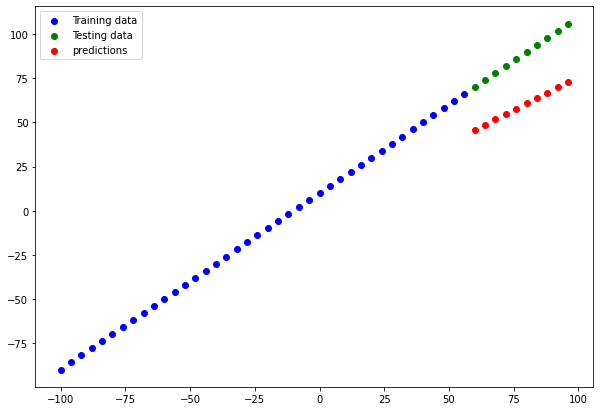

In [48]:
plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred1)

In [49]:
mae1 = mae(y_test, y_pred1)
mse1 = mse(y_test,y_pred1)
mae1, mse1

(<tf.Tensor: shape=(), dtype=float32, numpy=28.659399>,
 <tf.Tensor: shape=(), dtype=float32, numpy=828.96497>)

#### model 2

In [68]:
model_2 = tf.keras.Sequential(
    [
     tf.keras.layers.Dense(100),
     tf.keras.layers.Dense(1)
    ]
)
model_2.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ['mae']
)
model_2.fit(X_train, y_train, epochs=100, verbose=0)

In [69]:
y_pred2 = model_2.predict(X_test)


In [70]:
y_pred2.shape

(10, 1)

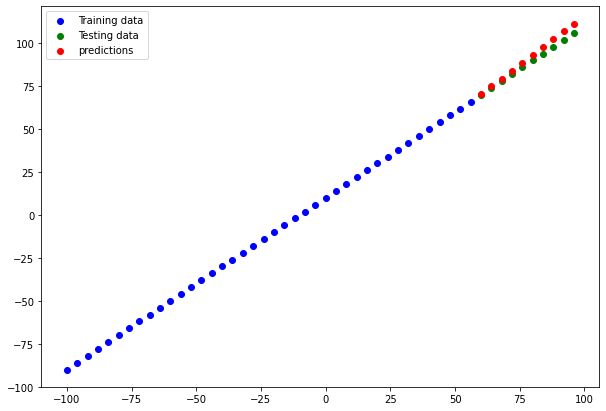

In [71]:
plot_predictions(predictions=y_pred2)

In [72]:
mae2 = mae(y_test, y_pred2)
mse2 = mse(y_test,y_pred2)
mae2, mse2

(<tf.Tensor: shape=(), dtype=float32, numpy=2.914009>,
 <tf.Tensor: shape=(), dtype=float32, numpy=11.215452>)

#### model 3

In [79]:
tf.random.set_seed(42)
model_3 = tf.keras.Sequential([
      tf.keras.layers.Dense(100),
      tf.keras.layers.Dense(1)                        
])

model_3.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ['mse']
)

model_3.fit(X_train, y_train, epochs=500, verbose=0)

In [80]:
y_pred3 = model_3.predict(X_test)

In [81]:
mse3 = mse(y_pred=y_pred3, y_true=y_test)
mae3 = mae(y_true=y_test, y_pred=y_pred3)
mae3, mse3

(<tf.Tensor: shape=(), dtype=float32, numpy=67.21916>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4601.0557>)

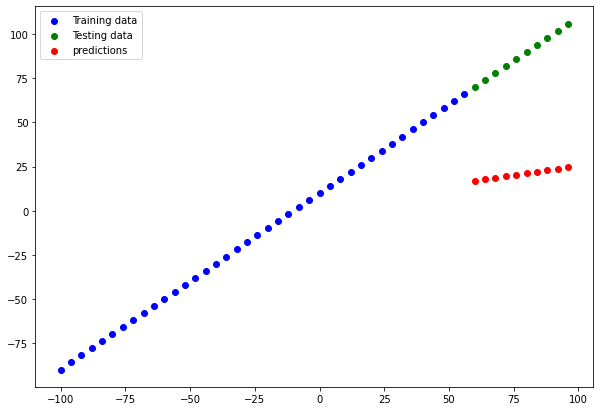

In [82]:
plot_predictions(predictions=y_pred3)

### Start will smaller models and increase if necessary,  to minimize time between experiements



### Comparing experiements

In [85]:
import pandas as pd

model_results = [["model_1", mae1.numpy(), mse1.numpy(), model1_desc],
                 ["model_2", mae2.numpy(), mse2.numpy(), model2_desc],
                 ["model_3", mae3.numpy(), mse3.numpy(), model3_desc]]
results =pd.DataFrame(model_results, columns=['models', 'mae', 'mse', "description"])
results

,models,mae,mse,description
0,model_1,28.659399,828.964966,"one layer(1), 100 epochs"
1,model_2,2.914009,11.215452,"2 layers(100,1), 100 epochs"
2,model_3,67.219162,4601.055664,"2 layers(100,1), 500 epochs"


In [86]:
model_2.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 100)               200       
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 101       
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


### Tracking your experiments
- **TensorBoard** -  component of the tf library to help track modelling experiments
- **Weight & biases**

### Saving models

In [92]:
## Default SavedModel format
model_2.save("best_model_saved")

INFO:tensorflow:Assets written to: best_model_saved/assets


In [93]:
## saving .hdf5 format(hierachical data format)
model_2.save('best_model_saved.h5')

In [88]:
model_2.save_weights("model2_weights")

### Loading a model

In [94]:
my_model = tf.keras.models.load_model('best_model_saved.h5')

In [96]:
mypred = my_model.predict(y_test)
my_model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 81ms/step - loss: 2.9140 - mae: 2.9140


[2.914008378982544, 2.914008378982544]

In [98]:
model_2.evaluate(X_test, y_test)

1/1 [==============================] - 0s 82ms/step - loss: 2.9140 - mae: 2.9140


[2.914008378982544, 2.914008378982544]

In [99]:
h5_model = tf.keras.models.load_model('best_model_saved.h5')
h5_model_preds = h5_model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 77ms/step - loss: 2.9140 - mae: 2.9140


### Download files from Colab

- Right click the file and download
- using code like below
- connect to google drive

In [101]:
from google.colab import files

In [102]:
files.download('/content/best_model_saved.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### A Larger Example

In [104]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [105]:
insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')

In [106]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Handling object datatypes

In [108]:
# converting df into all numbers
insurance_one_hot  = pd.get_dummies(insurance)
insurance_one_hot.tail()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
1333,50,30.97,3,10600.5483,0,1,1,0,0,1,0,0
1334,18,31.92,0,2205.9808,1,0,1,0,1,0,0,0
1335,18,36.85,0,1629.8335,1,0,1,0,0,0,1,0
1336,21,25.80,0,2007.9450,1,0,1,0,0,0,0,1
1337,61,29.07,0,29141.3603,1,0,0,1,0,1,0,0


In [112]:
## Create X and Y values
y = insurance_one_hot.charges
X = insurance_one_hot.drop(['charges'], axis=1)
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [119]:
## Our label
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [114]:
from sklearn.model_selection import train_test_split

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [121]:
X.shape , X_train.shape, y.shape, y_train.shape

((1338, 11), (1070, 11), (1338,), (1070,))

In [122]:
## Creating model

tf.random.set_seed(42)

# 1.Model

insurance_model = tf.keras.Sequential(
    [
     tf.keras.layers.Dense(10),
     tf.keras.layers.Dense(1)
    ]
)

#2.compile the model
insurance_model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ['mae']
)

#3. Fit the model
insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 1ms/step - loss: 8637.1006 - mae: 8637.1006
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 7886.7759 - mae: 7886.7759
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 7558.1470 - mae: 7558.1470
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 7792.0225 - mae: 7792.0225
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 7748.3887 - mae: 7748.3887
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 7595.3940 - mae: 7595.3940
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 7589.9849 - mae: 7589.9849
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 7698.5591 - mae: 7698.5591
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 7496.7783 - mae: 7496.7783
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 7493.1743 - mae: 7493.1743

In [123]:
# Check the results of insurance model on test data
insurance_model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7023.3291 - mae: 7023.3291


[7023.3291015625, 7023.3291015625]

In [124]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364489)

-  The model performs poorly

In [147]:
# random seed
tf.random.set_seed(42)

insurance_model_2 = tf.keras.Sequential(
    [
     tf.keras.layers.Dense(100),
     tf.keras.layers.Dense(10),
     tf.keras.layers.Dense(1)
    ]
)
insurance_model_2.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(lr=0.01),
    metrics=['mae']
)
history = insurance_model_2.fit(X_train, y_train, epochs=100)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
34/34 [==============================] - 0s 1ms/step - loss: 11434.4707 - mae: 11434.4707
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 7504.8159 - mae: 7504.8159
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 7289.5015 - mae: 7289.5015
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 7064.4624 - mae: 7064.4624
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 6825.5918 - mae: 6825.5918
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 6569.6001 - mae: 6569.6001
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 6442.8633 - mae: 6442.8633
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 6254.7837 - mae: 6254.7837
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 6121.5996 - mae: 6121.5996
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 5940.2451 - mae: 5940.24

In [148]:
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3167.3215 - mae: 3167.3215


[3167.321533203125, 3167.321533203125]

In [ ]:
history.history

Text(0.5, 0, 'Epochs')

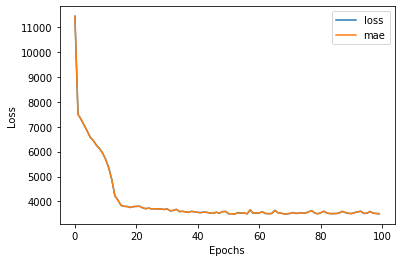

In [154]:
## Plotting the learning curve
pd.DataFrame(history.history).plot()
plt.ylabel('Loss')
plt.xlabel('Epochs')

## How long do you train for

- It depends on the problem
- Tensorflow provides a callback to stop training when certain metrics are met

In [163]:
callback = tf.keras.callbacks.EarlyStopping(
    monitor = 'loss',
    patience = 5,
    min_delta = 0.01,
    restore_best_weights=True
)

insurance_model_2.fit(X_train, y_train, callbacks=[callback], epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 1ms/step - loss: 3524.5081 - mae: 3524.5081
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 3541.1106 - mae: 3541.1106
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 3535.0889 - mae: 3535.0889
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 3521.2251 - mae: 3521.2251
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 3519.4839 - mae: 3519.4839
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 3586.7666 - mae: 3586.7666
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 3510.5273 - mae: 3510.5273
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 3531.8000 - mae: 3531.8000
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 3505.3474 - mae: 3505.3474
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 3642.5254 - mae: 3642.5254

## Data Preprocessing
### Standardization and normalization
- put data on a common scale.
- The age, children, dmi in our data set are all on their own scales

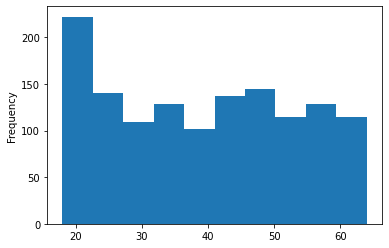

In [157]:
X.age.plot(kind="hist")

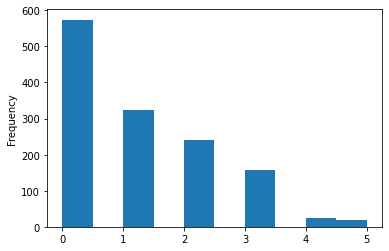

In [159]:
X.children.plot(kind='hist')

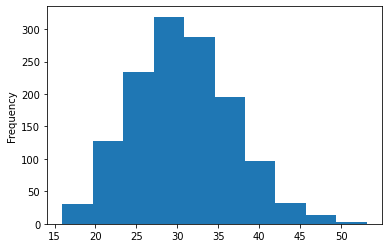

In [162]:
X.bmi.plot(kind='hist')

- Normalization - convert the values between 0 and 1 while maintainng the original distribution
- in terms of scaling values, nn prefer normalization

In [164]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [165]:
insurance_norm = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')

In [166]:
## use sklearn to transform data
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [167]:
## We scale numerical features and one hot encode no numerical ones
ct = make_column_transformer(
    (MinMaxScaler(), ['age', 'bmi', 'children']),
    (OneHotEncoder(handle_unknown='ignore'), ['sex', 'smoker', 'region'])
)

In [168]:
# Create features and labels
X = insurance_norm.drop('charges', axis=1)
y = insurance_norm.charges

In [169]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [170]:
# fit the transform
ct.fit(X_train)

ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('minmaxscaler',
                                 MinMaxScaler(copy=True, feature_range=(0, 1)),
                                 ['age', 'bmi', 'children']),
                                ('onehotencoder',
                                 OneHotEncoder(categories='auto', drop=None,
                                               dtype=<class 'numpy.float64'>,
                                               handle_unknown='ignore',
                                               sparse=True),
                                 ['sex', 'smoker', 'region'])],
                  verbose=False)

In [172]:
# Convert the features into the transformed format
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [176]:
X_test_normal[9]

array([0.67391304, 0.3424805 , 0.6       , 0.        , 1.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

### NN for the normalized data


In [178]:
insurance_model_2.summary()

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_69 (Dense)             (None, 100)               1200      
_________________________________________________________________
dense_70 (Dense)             (None, 10)                1010      
_________________________________________________________________
dense_71 (Dense)             (None, 1)                 11        
Total params: 2,221
Trainable params: 2,221
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# replicate the best model
tf.random.set_seed(42)

insurance_model_3 = tf.keras.Sequential(
    [
     tf.keras.layers.Dense(100),
     tf.keras.layers.Dense(10),
     tf.keras.layers.Dense(1)
    ]
)

insurance_model_3.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(lr=0.01),
    metrics=['mae']
)
insurance_model_3.fit(X_train_normal, y_train, epochs=100, callbacks=[callback])

In [185]:
insurance_model_3.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 1ms/step - loss: 3168.5432 - mae: 3168.5432


[3168.543212890625, 3168.543212890625]

# Exercises

1. Create your own regresson dataset  and fit a model


In [212]:
X_e = tf.constant(tf.range(1,1000, 12))
y_e = 2.76 * tf.cast(X_e, dtype=tf.float16) + 8

In [213]:
X_e, y_e

(<tf.Tensor: shape=(84,), dtype=int32, numpy=
 array([  1,  13,  25,  37,  49,  61,  73,  85,  97, 109, 121, 133, 145,
        157, 169, 181, 193, 205, 217, 229, 241, 253, 265, 277, 289, 301,
        313, 325, 337, 349, 361, 373, 385, 397, 409, 421, 433, 445, 457,
        469, 481, 493, 505, 517, 529, 541, 553, 565, 577, 589, 601, 613,
        625, 637, 649, 661, 673, 685, 697, 709, 721, 733, 745, 757, 769,
        781, 793, 805, 817, 829, 841, 853, 865, 877, 889, 901, 913, 925,
        937, 949, 961, 973, 985, 997], dtype=int32)>,
 <tf.Tensor: shape=(84,), dtype=float16, numpy=
 array([  10.76,   43.88,   77.  ,  110.1 ,  143.2 ,  176.4 ,  209.5 ,
         242.6 ,  275.8 ,  308.8 ,  342.  ,  375.  ,  408.2 ,  441.2 ,
         474.5 ,  507.5 ,  540.5 ,  574.  ,  607.  ,  640.  ,  673.  ,
         706.  ,  739.5 ,  772.5 ,  805.5 ,  838.5 ,  872.  ,  905.  ,
         938.  ,  971.  , 1004.5 , 1037.  , 1071.  , 1104.  , 1137.  ,
        1170.  , 1203.  , 1236.  , 1269.  , 1302.  , 1335. 

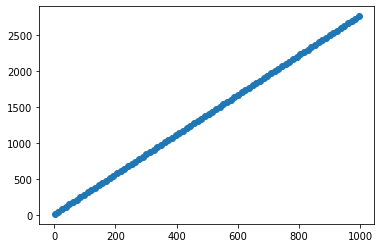

In [214]:
plt.scatter(X_e, y_e)

In [222]:
X_e.shape

TensorShape([84])

In [223]:
X_e_train, X_e_test, y_e_train, y_e_test = X_e[:64], X_e[64:], y_e[:64], y_e[64:]

In [224]:
X_e_train, X_e_test

(<tf.Tensor: shape=(64,), dtype=int32, numpy=
 array([  1,  13,  25,  37,  49,  61,  73,  85,  97, 109, 121, 133, 145,
        157, 169, 181, 193, 205, 217, 229, 241, 253, 265, 277, 289, 301,
        313, 325, 337, 349, 361, 373, 385, 397, 409, 421, 433, 445, 457,
        469, 481, 493, 505, 517, 529, 541, 553, 565, 577, 589, 601, 613,
        625, 637, 649, 661, 673, 685, 697, 709, 721, 733, 745, 757],
       dtype=int32)>, <tf.Tensor: shape=(20,), dtype=int32, numpy=
 array([769, 781, 793, 805, 817, 829, 841, 853, 865, 877, 889, 901, 913,
        925, 937, 949, 961, 973, 985, 997], dtype=int32)>)

In [236]:
# model 
tf.random.set_seed(42)

e_model = tf.keras.Sequential(
    [
     tf.keras.layers.Dense(10),
     tf.keras.layers.Dense(1)
    ]
)

e_model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['mae']
)
history = e_model.fit(X_e_train, y_e_train, epochs=200, verbose=0)

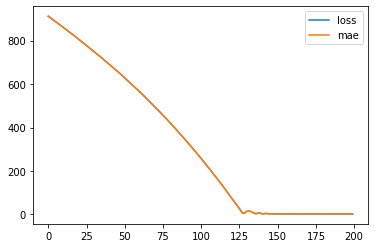

In [237]:
pd.DataFrame(history.history).plot()

In [251]:
e_model.evaluate(X_e_test, y_e_test)

1/1 [==============================] - 0s 94ms/step - loss: 3.0879 - mae: 3.0879


[3.087939500808716, 3.087939500808716]

In [261]:
e_model_2 = tf.keras.Sequential(
    [
     tf.keras.layers.Dense(100),
     tf.keras.layers.Dense(1)
    ]
)

e_model_2.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics = ['mae']
)

history = e_model_2.fit(X_e_train, y_e_train, epochs=100, verbose = 0)

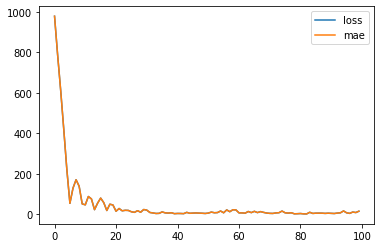

In [262]:
pd.DataFrame(history.history).plot()

In [263]:
e_model_2.evaluate(X_e_test, y_e_test)

1/1 [==============================] - 0s 91ms/step - loss: 1.9160 - mae: 1.9160


[1.9160277843475342, 1.9160277843475342]

### Boston Dataset

In [267]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.boston_housing.load_data(
    path='boston_housing.npz', test_split=0.2, seed=113
)

In [270]:
x_train.shape, y_train.shape, X_test.shape

((404, 13), (404,), (268, 6))

In [273]:
x_train.dtype

dtype('float64')

In [ ]:
boston_model = tf.keras.Sequential(
    [
     tf.keras.layers.Dense(10),
     tf.keras.layers.Dense(1)
    ]
)

boston_model.compile(
    loss = tf.keras.losses.mse,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['mae']
)

history = boston_model.fit(x_train, y_train, epochs=100)


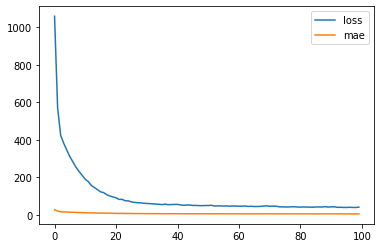

In [285]:
pd.DataFrame(history.history).plot()

In [286]:
boston_model.evaluate(x_test, y_test)

4/4 [==============================] - 0s 2ms/step - loss: 46.4542 - mae: 4.9603


[46.45423126220703, 4.960337162017822]

In [289]:
boston_model.save("boston_model_saved")

INFO:tensorflow:Assets written to: boston_model_saved/assets


In [ ]:
boston_model.save("")